# Plot One Region
This file imports the covid19 package and 
shows how to use it to plot data about one state or one group of states.

In [1]:
from covid19 import *

done


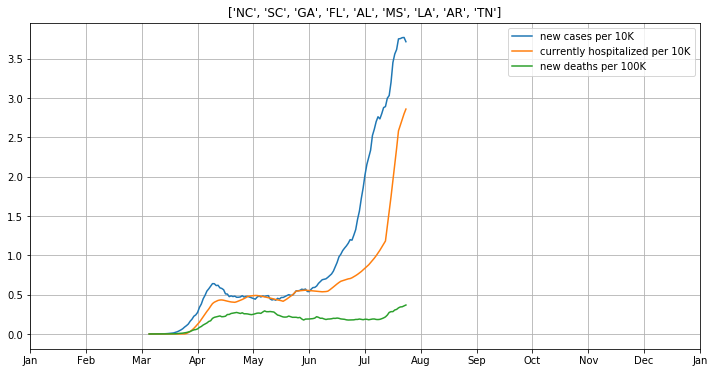

In [2]:
s = southEast #['MA'] # list of states to be analyzed... states is all US states and territories

plt.rcParams['figure.figsize'] = [12, 6]  # set the size of the plot

# plot three fields and specify their labels for the legend
plotItems(collectData(s,'positiveIncrease'),'new cases per 10K')
plotItems(collectData(s,'hospitalizedCurrently'),'currently hospitalized per 10K')
plotItems([(d[0],d[1]*10) for d in collectData(s,'deathIncrease')],'new deaths per 100K')

# print the title, legend, and add a grid
plt.title(s if len(s)<10 else str(list(s)[:10])+" and more")
plt.legend()
plt.grid()

The collectData function takes two parameters ... a list of states, and a field name.
It also has two optional parameters, perCapita (defaults to True) and averageByWeek (defaults to True).
It returns a list of tuples where the first is the day of the year (1/1/2020 = 1 and 12/31/2020 = 366)
and the second is the value of that field for that day (possibly divided by the state population and/or averaged over the past week).

Here is an example of using it to find the number of new cases per day in the last 10 days in MA.

In [3]:
data = collectData(['MA'],'positiveIncrease',options={'perCapita':False,'averageByWeek':False})
data[-10:]

[(193, 288),
 (194, 199),
 (195, 230),
 (196, 303),
 (197, 217),
 (198, 234),
 (199, 298),
 (200, 359),
 (201, 296),
 (202, 255)]

and we can plot that data as follows:

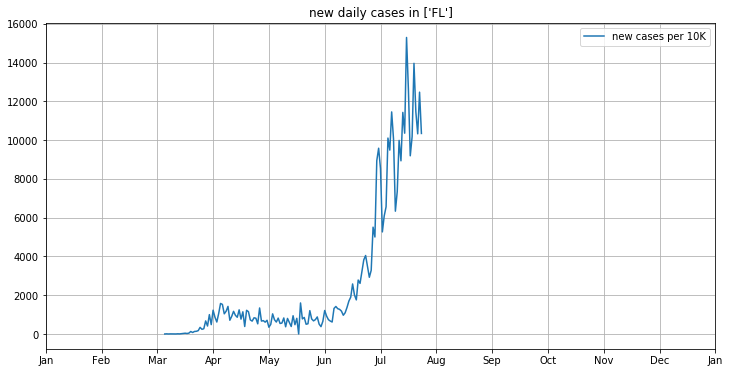

In [4]:
s = ['FL'] 
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [12, 6]
plotItems(
    collectData(s,'positiveIncrease',
                options={'perCapita':False,'averageByWeek':False}),
    'new cases per 10K')
plt.title("new daily cases in "+str(s))
plt.legend()
ax.grid()

Here is a list of all of the keys available, and you can learn more at the https://covidtracking.com site where we get the data.

In [5]:
list(cdata[0][0].keys())

['date',
 'state',
 'positive',
 'negative',
 'pending',
 'hospitalizedCurrently',
 'hospitalizedCumulative',
 'inIcuCurrently',
 'inIcuCumulative',
 'onVentilatorCurrently',
 'onVentilatorCumulative',
 'recovered',
 'dataQualityGrade',
 'lastUpdateEt',
 'dateModified',
 'checkTimeEt',
 'death',
 'hospitalized',
 'dateChecked',
 'totalTestsViral',
 'positiveTestsViral',
 'negativeTestsViral',
 'positiveCasesViral',
 'deathConfirmed',
 'deathProbable',
 'fips',
 'positiveIncrease',
 'negativeIncrease',
 'total',
 'totalTestResults',
 'totalTestResultsIncrease',
 'posNeg',
 'deathIncrease',
 'hospitalizedIncrease',
 'hash',
 'commercialScore',
 'negativeRegularScore',
 'negativeScore',
 'positiveScore',
 'score',
 'grade']

In [6]:
data = get_covid_data()
statedatum = data[0][0]
usdataum = data[1][0]
print("state keys")
print(list(statedatum))
print("us keys")
print(list(data[1][0]))


state keys
['date', 'state', 'positive', 'negative', 'pending', 'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered', 'dataQualityGrade', 'lastUpdateEt', 'dateModified', 'checkTimeEt', 'death', 'hospitalized', 'dateChecked', 'totalTestsViral', 'positiveTestsViral', 'negativeTestsViral', 'positiveCasesViral', 'deathConfirmed', 'deathProbable', 'fips', 'positiveIncrease', 'negativeIncrease', 'total', 'totalTestResults', 'totalTestResultsIncrease', 'posNeg', 'deathIncrease', 'hospitalizedIncrease', 'hash', 'commercialScore', 'negativeRegularScore', 'negativeScore', 'positiveScore', 'score', 'grade']
us keys
['date', 'states', 'positive', 'negative', 'pending', 'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered', 'dateChecked', 'death', 'hospitalized', 'lastModified', 'total', 'totalTestResults',

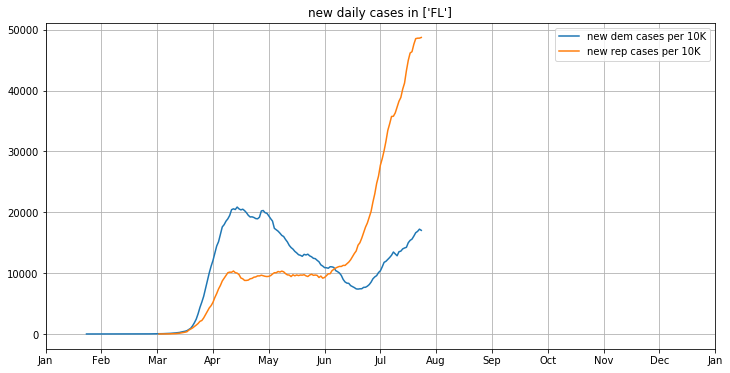

In [9]:
 
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [12, 6]
plotItems(
    collectData(demStates,'positiveIncrease',
                options={'perCapita':False,'averageByWeek':True}),
    'new dem cases per 10K')
plotItems(
    collectData(repStates,'positiveIncrease',
                options={'perCapita':False,'averageByWeek':True}),
    'new rep cases per 10K')
plt.title("new daily cases in "+str(s))
plt.legend()
ax.grid()

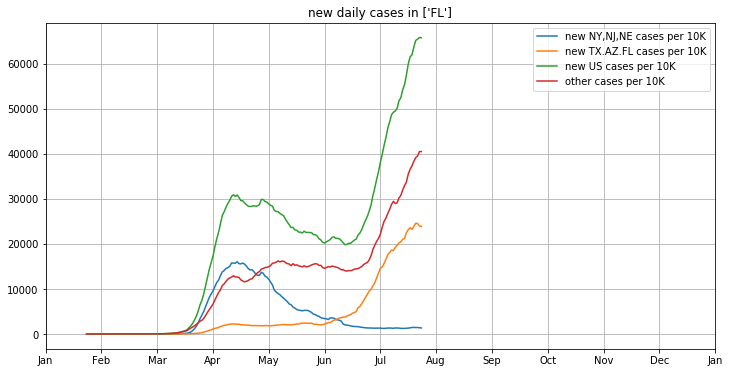

In [14]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [12, 6]
plotItems(
    collectData(['NY','NJ','CT','RI','MA'],'positiveIncrease',
                options={'perCapita':False,'averageByWeek':True}),
    'new NY,NJ,NE cases per 10K')
plotItems(
    collectData(['TX','FL','AZ'],'positiveIncrease',
                options={'perCapita':False,'averageByWeek':True}),
    'new TX.AZ.FL cases per 10K')
plotItems(
    collectData(states,'positiveIncrease',
                options={'perCapita':False,'averageByWeek':True}),
    'new US cases per 10K')
plotItems(
    collectData(otherStates(['NY','NJ','CT','RI','MA','TX','FL','AZ']),'positiveIncrease',
                options={'perCapita':False,'averageByWeek':True}),
    'other cases per 10K')
plt.title("new daily cases in "+str(s))
plt.legend()
ax.grid()